# Life Expectancy by Age, Gender and Counties in Kenya

2019 Kenya Population and Housing Census - KPHC Census Analytical Report
on Population Dynamics Volume VIII

Kabui, Charles  
2025-03-18

 *** 
[Read at <u>**ToKnow**</u>.ai](https://toknow.ai/posts/life-expectancy-age-gender-and-counties-in-kenya/index.html) -- [Download as Notebook](https://toknow.ai/posts/life-expectancy-age-gender-and-counties-in-kenya/index.output.ipynb) -- [Download as PDF](https://toknow.ai/posts/life-expectancy-age-gender-and-counties-in-kenya/index.pdf)
 *** 

We plot and analyze the life expectancy in Kenya by age, gender and
counties. The data is from the 2019 Kenya Population and Housing Census.
The data is available in the [Kenya National Bureau of Statistics
website](https://www.knbs.or.ke/reports/kenya-census-2019/) [1]. We will
extract the data from Table 5.7, page 70 of the [KPHC Census Analytical
Report on Population Dynamics Volume
VIII](https://web.archive.org/web/20250318194027/https://www.knbs.or.ke/wp-content/uploads/2024/05/2019-Kenya-Population-and-Housing-Census-Analytical-Report-on-Population-Dynamics-Vol-VIII.pdf)
[2]

The following is an image of the table we will be using:

[1] [Kenya National Bureau of Statistics
website](https://www.knbs.or.ke/reports/kenya-census-2019/)

[2] [KPHC Census Analytical Report on Population Dynamics Volume
VIII](https://web.archive.org/web/20250318194027/https://www.knbs.or.ke/wp-content/uploads/2024/05/2019-Kenya-Population-and-Housing-Census-Analytical-Report-on-Population-Dynamics-Vol-VIII.pdf)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from IPython.display import display, Markdown

In [11]:
data_dict = {
    ('', 'COUNTY/RESIDENCE'): [
        "Kenya",
        "Rural",
        "Urban",
        "Mombasa",
        "Kwale",
        "Kilifi",
        "Tana River",
        "Lamu",
        "Taita Taveta",
        "Garissa",
        "Wajir",
        "Mandera",
        "Marsabit",
        "Isiolo",
        "Meru",
        "Tharaka-Nithi",
        "Embu",
        "Kitui",
        "Machakos",
        "Makueni",
        "Nyandarua",
        "Nyeri",
        "Kirinyaga",
        "Murang'a",
        "Kiambu",
        "Turkana",
        "West Pokot",
        "Samburu",
        "Trans Nzoia",
        "Uasin Gishu",
        "Elgeyo Marakwet",
        "Nandi",
        "Baringo",
        "Laikipia",
        "Nakuru",
        "Narok",
        "Kajiado",
        "Kericho",
        "Bomet",
        "Kakamega",
        "Vihiga",
        "Bungoma",
        "Busia",
        "Siaya",
        "Kisumu",
        "Homa Bay",
        "Migori",
        "Kisii",
        "Nyamira",
        "Nairobi"
    ],
    ("MALE", "birth (age 0)"): [
        60.6,
        60.3,
        63.0,
        65.7,
        58.2,
        57.8,
        56.2,
        64.1,
        61.2,
        57.4,
        56.7,
        57.3,
        57.9,
        60.1,
        62.2,
        63.8,
        58.7,
        55.7,
        57.9,
        58.1,
        58.0,
        66.4,
        59.9,
        58.1,
        60.8,
        55.9,
        57.6,
        58.5,
        64.4,
        63.6,
        57.9,
        60.0,
        65.4,
        59.2,
        58.3,
        57.8,
        57.8,
        58.1,
        58.1,
        63.4,
        59.8,
        65.5,
        62.3,
        53.4,
        54.0,
        50.5,
        50.5,
        56.1,
        55.3,
        62.6
    ],
    ("MALE", "age 20"): [
        44.9,
        44.6,
        47.2,
        51.0,
        42.9,
        43.0,
        42.5,
        50.9,
        45.9,
        43.1,
        42.8,
        43.0,
        42.6,
        45.9,
        47.8,
        47.3,
        43.3,
        40.3,
        41.9,
        42.2,
        42.2,
        49.9,
        44.0,
        42.6,
        44.4,
        42.1,
        42.9,
        42.6,
        49.6,
        48.0,
        42.4,
        44.6,
        50.3,
        42.6,
        43.6,
        43.0,
        41.9,
        42.4,
        42.9,
        49.5,
        46.2,
        50.6,
        48.8,
        39.9,
        40.1,
        38.7,
        40.1,
        40.7,
        40.0,
        48.4
    ],
    ("MALE", "age 60"): [
        14.2,
        14.5,
        15.3,
        17.7,
        14.0,
        14.1,
        14.0,
        17.7,
        15.7,
        14.1,
        14.1,
        14.1,
        14.7,
        15.7,
        16.4,
        16.2,
        14.9,
        14.0,
        13.7,
        13.8,
        13.8,
        16.3,
        15.1,
        13.9,
        15.2,
        14.5,
        14.1,
        14.6,
        17.1,
        16.5,
        13.9,
        15.3,
        17.4,
        14.7,
        15.0,
        14.1,
        13.7,
        13.9,
        14.0,
        17.1,
        15.8,
        17.6,
        16.8,
        13.9,
        14.0,
        13.7,
        14.0,
        14.2,
        14.0,
        16.6
    ],
    ("MALE", "age 80"): [
        5.7,
        5.4,
        5.6,
        5.9,
        5.3,
        5.3,
        5.2,
        5.9,
        5.6,
        5.2,
        5.2,
        5.2,
        5.5,
        5.6,
        5.7,
        5.7,
        5.5,
        5.4,
        5.3,
        5.3,
        5.3,
        6.0,
        5.5,
        5.3,
        5.5,
        5.4,
        5.2,
        5.5,
        5.8,
        5.7,
        5.3,
        5.5,
        5.9,
        5.5,
        5.5,
        5.3,
        5.3,
        5.3,
        5.3,
        5.8,
        5.6,
        5.9,
        5.7,
        5.4,
        5.4,
        5.3,
        5.4,
        5.4,
        5.4,
        5.7
    ],
    ("FEMALE", "birth (age 0)"): [
        66.5,
        66.2,
        68.6,
        71.1,
        60.7,
        59.2,
        58.6,
        68.9,
        69.2,
        60.5,
        62.0,
        60.5,
        62.6,
        59.6,
        68.2,
        70.3,
        70.1,
        68.8,
        63.9,
        62.4,
        63.2,
        75.8,
        71.1,
        64.7,
        72.8,
        60.0,
        61.1,
        67.4,
        67.9,
        71.7,
        62.5,
        70.4,
        68.9,
        71.9,
        69.1,
        61.9,
        63.5,
        62.9,
        63.6,
        66.1,
        62.1,
        68.2,
        66.2,
        61.6,
        63.1,
        60.2,
        60.6,
        66.9,
        66.2,
        65.2
    ],
    ("FEMALE", "age 20"): [
        50.8,
        50.9,
        52.9,
        55.3,
        45.5,
        44.6,
        44.4,
        53.3,
        52.9,
        45.6,
        46.4,
        45.5,
        46.4,
        44.4,
        52.8,
        53.1,
        53.9,
        52.3,
        47.7,
        46.6,
        47.2,
        59.6,
        54.8,
        48.3,
        55.8,
        45.6,
        45.8,
        51.3,
        52.5,
        55.2,
        46.7,
        54.3,
        52.4,
        54.5,
        53.8,
        46.3,
        47.4,
        47.0,
        47.5,
        51.3,
        49.0,
        52.6,
        51.8,
        47.2,
        48.6,
        47.6,
        48.9,
        50.6,
        50.2,
        50.2
    ],
    ("FEMALE", "age 60"): [
        17.2,
        17.7,
        18.4,
        20.0,
        16.2,
        15.9,
        15.9,
        18.9,
        18.7,
        16.2,
        16.4,
        16.2,
        16.0,
        15.4,
        18.7,
        18.8,
        19.2,
        18.4,
        16.8,
        16.5,
        16.7,
        22.2,
        19.7,
        17.0,
        20.2,
        15.7,
        16.3,
        18.0,
        18.5,
        19.9,
        16.5,
        19.4,
        18.5,
        19.5,
        19.2,
        16.4,
        16.7,
        16.6,
        16.8,
        18.0,
        17.0,
        18.6,
        18.2,
        16.3,
        16.8,
        16.5,
        17.0,
        17.7,
        17.5,
        17.5
    ],
    ("FEMALE", "age 80"): [
        6.2,
        6.3,
        6.4,
        6.5,
        6.1,
        6.0,
        6.0,
        6.3,
        6.2,
        6.1,
        6.2,
        6.1,
        5.7,
        5.7,
        6.2,
        6.3,
        6.4,
        6.2,
        6.3,
        6.2,
        6.2,
        7.4,
        6.5,
        6.3,
        6.6,
        5.7,
        6.1,
        6.1,
        6.2,
        6.5,
        6.2,
        6.4,
        6.2,
        6.4,
        6.3,
        6.2,
        6.3,
        6.2,
        6.3,
        6.1,
        5.9,
        6.2,
        6.1,
        5.8,
        5.9,
        5.8,
        5.9,
        6.0,
        6.0,
        6.0
    ]
}
df = pd.DataFrame(data_dict)
df.set_index(df.columns[0], inplace=True)
df


## Plots and Insights

In [12]:
def life_expectancy_analysis(age_column: str, axis_margin: float = 1.2):
    ### Life Expectancy
    display(Markdown(
        "\n"
        f"### Life Expectancy at {age_column}"
        "\n"))
    kenya = df.loc["Kenya"]
    rural = df.loc["Rural"]
    urban = df.loc["Urban"]
    drop_columns = [kenya.name, rural.name, urban.name]
    males = df[('MALE', age_column)].drop(drop_columns).tolist()
    females = df[('FEMALE', age_column)].drop(drop_columns).tolist()
    counties = df.index.drop(drop_columns).tolist()
    #### Plotting
    display(Markdown(
        "\n"
        f"#### Plot - {age_column}"
        "\n"))
    plt.figure(figsize=(12, 10))
    # Plot the counties
    sns.scatterplot(
        x=males, y=females, s=60, alpha=0.9, label='Counties Life Expectancy')
    # Plot reference lines for Kenya, Rural, Urban
    plt.axvline(
        x=kenya[('MALE', age_column)], color='r', linestyle='dashdot',  alpha=0.3)
    plt.axhline(
        y=kenya[('FEMALE', age_column)], color='r', linestyle='dashdot', alpha=0.3, 
        label='National Life Expectancy')
    plt.axvline(
        x=rural[('MALE', age_column)], color='g', linestyle='dashdot', alpha=0.3)
    plt.axhline(
        y=rural[('FEMALE', age_column)], color='g', linestyle='dashdot', alpha=0.3, 
        label='Rural Life Expectancy')
    plt.axvline(
        x=urban[('MALE', age_column)], color='b', linestyle='dashdot', alpha=0.3)
    plt.axhline(
        y=urban[('FEMALE', age_column)], color='b', linestyle='dashdot', alpha=0.3, 
        label='Urban Life Expectancy')
    # Add diagonal line representing equal life expectancy
    min_val = min(min(males), min(females))
    max_val = max(max(males), max(females))
    plt.plot(
        [min_val, max_val], [min_val, max_val], color='gray', linestyle='solid', 
        alpha=0.3, label='Equal Life Expectancy')
    # Add labels for reference points
    texts = [
        plt.text(males[i], females[i], counties[i], fontsize=10) 
        for i 
        in range(len(counties))]
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
    # Adjust limits based on scatter data
    plt.xlim(min(males) - axis_margin, max(males) + axis_margin) 
    plt.ylim(min(females) - axis_margin, max(females) + axis_margin)
    plt.grid(True, alpha=0.2)
    plt.title(
        f'Life Expectancy at {age_column} by County in Kenya: Male vs Female', 
        fontsize=16)
    plt.xlabel('Male Life Expectancy (years)', fontsize=14)
    plt.ylabel('Female Life Expectancy (years)', fontsize=14)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
    #### Analysis of Life Expectancy
    display(Markdown(
        "\n"
        f"#### Analysis of Life Expectancy at {age_column}"
        "\n"))
    kenya_males = kenya[('MALE', age_column)]
    kenya_females = kenya[('FEMALE', age_column)]
    rural_males = rural[('MALE', age_column)]
    rural_females = rural[('FEMALE', age_column)]
    urban_males = urban[('MALE', age_column)]
    urban_females = urban[('FEMALE', age_column)]
    county_analysis_df = pd.DataFrame({ 
        'COUNTY': counties, 
        'MALE': males, 
        'FEMALE': females 
    })
    ##### Top 5 counties greatest and least life expectancy
    display(Markdown(
        "\n"
        f"##### Top 5 counties with greatest and least life expectancy - {age_column}"
        "\n"))
    men_by_county_asc = county_analysis_df\
        .sort_values("MALE", ascending=True)\
        .head(5)\
        .apply(lambda x: f'{x["COUNTY"] } - {x["MALE"]}', axis=1)\
        .tolist()
    men_by_county_desc = county_analysis_df\
        .sort_values("MALE", ascending=False)\
        .head(5)\
        .apply(lambda x: f'{x["COUNTY"] } - {x["MALE"]}', axis=1)\
        .tolist()
    women_by_county_asc = county_analysis_df\
        .sort_values("FEMALE", ascending=True)\
        .head(5)\
        .apply(lambda x: f'{x["COUNTY"] } - {x["FEMALE"]}', axis=1)\
        .tolist()
    women_by_county_desc = county_analysis_df\
        .sort_values("FEMALE", ascending=False)\
        .head(5)\
        .apply(lambda x: f'{x["COUNTY"] } - {x["FEMALE"]}', axis=1)\
        .tolist()
    display(pd.DataFrame({ 
        '[men] by_county_desc': men_by_county_desc,
        '[men] by_county_asc': men_by_county_asc, 
        '[women] by_county_desc': women_by_county_desc,
        '[women] by_county_asc': women_by_county_asc,
    }, index=range(1, 6)))
    # Analysis
    def above_or_below(reference: str, males: float, females: float):
        men_by_county_below = county_analysis_df\
            [county_analysis_df["MALE"] <= males]\
            .sort_values("MALE", ascending=True)\
            .apply(lambda x: f'{x["COUNTY"] } - {x["MALE"]}', axis=1)\
            .tolist()
        men_by_county_above = county_analysis_df\
            [county_analysis_df["MALE"] > males]\
            .sort_values("MALE", ascending=False)\
            .apply(lambda x: f'{x["COUNTY"] } - {x["MALE"]}', axis=1)\
            .tolist()
        women_by_county_below = county_analysis_df\
            [county_analysis_df["FEMALE"] <= females]\
            .sort_values("FEMALE", ascending=True)\
            .apply(lambda x: f'{x["COUNTY"] } - {x["FEMALE"]}', axis=1)\
            .tolist()
        women_by_county_above = county_analysis_df\
            [county_analysis_df["FEMALE"] > females]\
            .sort_values("FEMALE", ascending=False)\
            .apply(lambda x: f'{x["COUNTY"] } - {x["FEMALE"]}', axis=1)\
            .tolist()
        return pd.DataFrame.from_dict({ 
            f'({len(men_by_county_above)}) [men] above {reference}': men_by_county_above[:6],
            f'({len(men_by_county_below)}) [men] below {reference}': men_by_county_below[:6], 
            f'({len(women_by_county_above)}) [women] above {reference}': women_by_county_above[:6],
            f'({len(women_by_county_below)}) [women] below {reference}': women_by_county_below[:6],
        }, orient='index').T.reindex(index=range(1, 6))
    ##### Top 5 counties above and below national life expectancy"
    display(Markdown(
        "\n"
        f"##### Top 5 counties above and below National life expectancy - {age_column}"
        "\n"))
    display(above_or_below('national', kenya_males, kenya_females))
    ##### Top 5 counties above and below urban life expectancy
    display(Markdown(
        "\n"
        f"##### Top 5 counties above and below Rural life expectancy - {age_column}"
        "\n"))
    display(above_or_below('rural', rural_males, rural_females))
    ##### Top 5 counties above and below urban life expectancy
    display(Markdown(
        "\n"
        f"##### Top 5 counties above and below Urban life expectancy - {age_column}"
        "\n"))
    display(above_or_below('urban', urban_males, urban_females))
    ##### Top 5 counties where men have higher life expectancy than women
    men_greater_than_women = county_analysis_df\
        [county_analysis_df["FEMALE"] < county_analysis_df["MALE"]]
    if men_greater_than_women is not None and not men_greater_than_women.empty:
        display(Markdown(
            "\n"
            f"##### Top 5 counties where men have higher life expectancy than women - {age_column}"
            "\n"))
        display(men_greater_than_women.sort_values("FEMALE", ascending=True))
    display(Markdown(
        "\n"
        f"##### Other Statistics - {age_column}"
        "\n"))
    display(county_analysis_df.describe())

In [13]:
life_expectancy_analysis('birth (age 0)')

``` python
life_expectancy_analysis('age 20')
```

### Life Expectancy at age 20

#### Plot - age 20

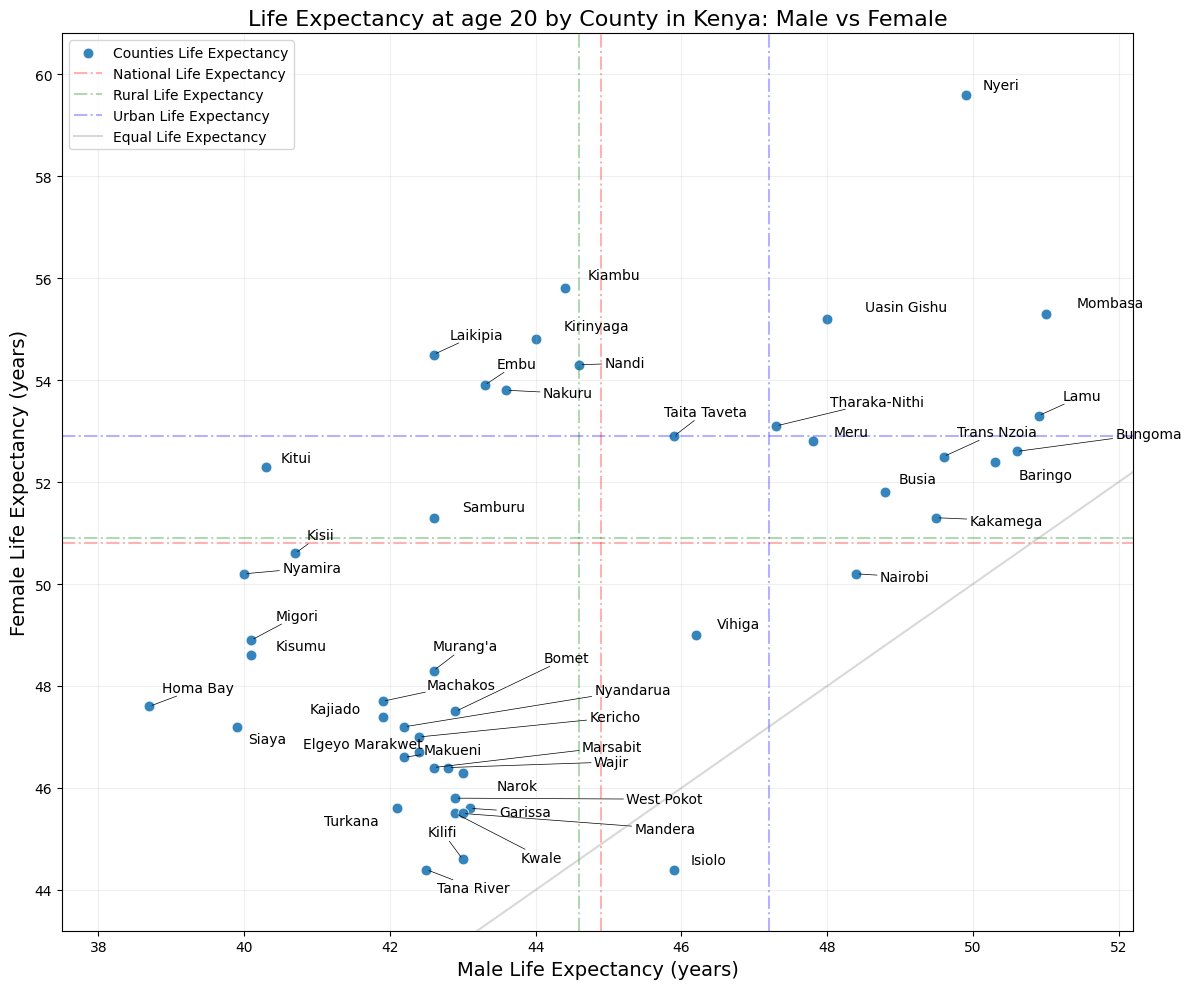

#### Analysis of Life Expectancy at age 20

##### Top 5 counties with greatest and least life expectancy - age 20

|  | \[men\] by_county_desc | \[men\] by_county_asc | \[women\] by_county_desc | \[women\] by_county_asc |
|----|----|----|----|----|
| 1 | Mombasa - 51.0 | Homa Bay - 38.7 | Nyeri - 59.6 | Tana River - 44.4 |
| 2 | Lamu - 50.9 | Siaya - 39.9 | Kiambu - 55.8 | Isiolo - 44.4 |
| 3 | Bungoma - 50.6 | Nyamira - 40.0 | Mombasa - 55.3 | Kilifi - 44.6 |
| 4 | Baringo - 50.3 | Migori - 40.1 | Uasin Gishu - 55.2 | Kwale - 45.5 |
| 5 | Nyeri - 49.9 | Kisumu - 40.1 | Kirinyaga - 54.8 | Mandera - 45.5 |

##### Top 5 counties above and below National life expectancy - age 20

|  | \(15\) \[men\] above national | \(32\) \[men\] below national | \(20\) \[women\] above national | \(27\) \[women\] below national |
|----|----|----|----|----|
| 1 | Lamu - 50.9 | Siaya - 39.9 | Kiambu - 55.8 | Isiolo - 44.4 |
| 2 | Bungoma - 50.6 | Nyamira - 40.0 | Mombasa - 55.3 | Kilifi - 44.6 |
| 3 | Baringo - 50.3 | Migori - 40.1 | Uasin Gishu - 55.2 | Kwale - 45.5 |
| 4 | Nyeri - 49.9 | Kisumu - 40.1 | Kirinyaga - 54.8 | Mandera - 45.5 |
| 5 | Trans Nzoia - 49.6 | Kitui - 40.3 | Laikipia - 54.5 | Garissa - 45.6 |

##### Top 5 counties above and below Rural life expectancy - age 20

|  | \(15\) \[men\] above rural | \(32\) \[men\] below rural | \(20\) \[women\] above rural | \(27\) \[women\] below rural |
|----|----|----|----|----|
| 1 | Lamu - 50.9 | Siaya - 39.9 | Kiambu - 55.8 | Isiolo - 44.4 |
| 2 | Bungoma - 50.6 | Nyamira - 40.0 | Mombasa - 55.3 | Kilifi - 44.6 |
| 3 | Baringo - 50.3 | Migori - 40.1 | Uasin Gishu - 55.2 | Kwale - 45.5 |
| 4 | Nyeri - 49.9 | Kisumu - 40.1 | Kirinyaga - 54.8 | Mandera - 45.5 |
| 5 | Trans Nzoia - 49.6 | Kitui - 40.3 | Laikipia - 54.5 | Garissa - 45.6 |

##### Top 5 counties above and below Urban life expectancy - age 20

|  | \(12\) \[men\] above urban | \(35\) \[men\] below urban | \(11\) \[women\] above urban | \(36\) \[women\] below urban |
|----|----|----|----|----|
| 1 | Lamu - 50.9 | Siaya - 39.9 | Kiambu - 55.8 | Isiolo - 44.4 |
| 2 | Bungoma - 50.6 | Nyamira - 40.0 | Mombasa - 55.3 | Kilifi - 44.6 |
| 3 | Baringo - 50.3 | Migori - 40.1 | Uasin Gishu - 55.2 | Kwale - 45.5 |
| 4 | Nyeri - 49.9 | Kisumu - 40.1 | Kirinyaga - 54.8 | Mandera - 45.5 |
| 5 | Trans Nzoia - 49.6 | Kitui - 40.3 | Laikipia - 54.5 | Garissa - 45.6 |

##### Top 5 counties where men have higher life expectancy than women - age 20

|     | COUNTY | MALE | FEMALE |
|-----|--------|------|--------|
| 10  | Isiolo | 45.9 | 44.4   |

##### Other Statistics - age 20

|       | MALE      | FEMALE    |
|-------|-----------|-----------|
| count | 47.000000 | 47.000000 |
| mean  | 44.285106 | 49.887234 |
| std   | 3.388983  | 3.748137  |
| min   | 38.700000 | 44.400000 |
| 25%   | 42.300000 | 46.650000 |
| 50%   | 43.000000 | 49.000000 |
| 75%   | 46.750000 | 52.850000 |
| max   | 51.000000 | 59.600000 |

``` python
life_expectancy_analysis('age 60')
```

### Life Expectancy at age 60

#### Plot - age 60

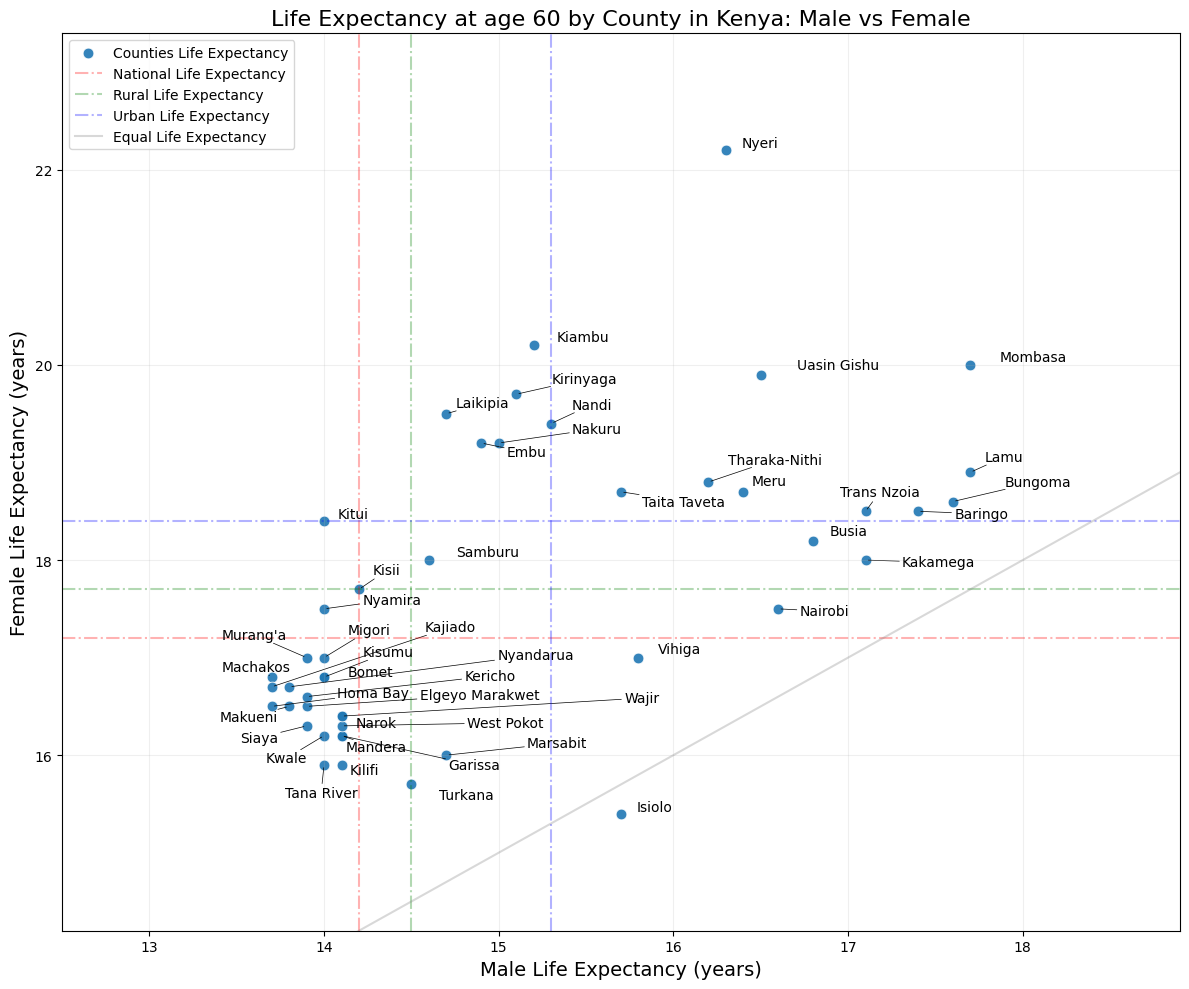

#### Analysis of Life Expectancy at age 60

##### Top 5 counties with greatest and least life expectancy - age 60

|  | \[men\] by_county_desc | \[men\] by_county_asc | \[women\] by_county_desc | \[women\] by_county_asc |
|----|----|----|----|----|
| 1 | Mombasa - 17.7 | Homa Bay - 13.7 | Nyeri - 22.2 | Isiolo - 15.4 |
| 2 | Lamu - 17.7 | Machakos - 13.7 | Kiambu - 20.2 | Turkana - 15.7 |
| 3 | Bungoma - 17.6 | Kajiado - 13.7 | Mombasa - 20.0 | Kilifi - 15.9 |
| 4 | Baringo - 17.4 | Nyandarua - 13.8 | Uasin Gishu - 19.9 | Tana River - 15.9 |
| 5 | Trans Nzoia - 17.1 | Makueni - 13.8 | Kirinyaga - 19.7 | Marsabit - 16.0 |

##### Top 5 counties above and below National life expectancy - age 60

|  | \(24\) \[men\] above national | \(23\) \[men\] below national | \(23\) \[women\] above national | \(24\) \[women\] below national |
|----|----|----|----|----|
| 1 | Lamu - 17.7 | Machakos - 13.7 | Kiambu - 20.2 | Turkana - 15.7 |
| 2 | Bungoma - 17.6 | Kajiado - 13.7 | Mombasa - 20.0 | Kilifi - 15.9 |
| 3 | Baringo - 17.4 | Makueni - 13.8 | Uasin Gishu - 19.9 | Tana River - 15.9 |
| 4 | Kakamega - 17.1 | Nyandarua - 13.8 | Kirinyaga - 19.7 | Marsabit - 16.0 |
| 5 | Trans Nzoia - 17.1 | Siaya - 13.9 | Laikipia - 19.5 | Kwale - 16.2 |

##### Top 5 counties above and below Rural life expectancy - age 60

|  | \(23\) \[men\] above rural | \(24\) \[men\] below rural | \(20\) \[women\] above rural | \(27\) \[women\] below rural |
|----|----|----|----|----|
| 1 | Lamu - 17.7 | Machakos - 13.7 | Kiambu - 20.2 | Turkana - 15.7 |
| 2 | Bungoma - 17.6 | Kajiado - 13.7 | Mombasa - 20.0 | Kilifi - 15.9 |
| 3 | Baringo - 17.4 | Makueni - 13.8 | Uasin Gishu - 19.9 | Tana River - 15.9 |
| 4 | Kakamega - 17.1 | Nyandarua - 13.8 | Kirinyaga - 19.7 | Marsabit - 16.0 |
| 5 | Trans Nzoia - 17.1 | Siaya - 13.9 | Laikipia - 19.5 | Kwale - 16.2 |

##### Top 5 counties above and below Urban life expectancy - age 60

|  | \(15\) \[men\] above urban | \(32\) \[men\] below urban | \(16\) \[women\] above urban | \(31\) \[women\] below urban |
|----|----|----|----|----|
| 1 | Lamu - 17.7 | Kajiado - 13.7 | Kiambu - 20.2 | Turkana - 15.7 |
| 2 | Bungoma - 17.6 | Machakos - 13.7 | Mombasa - 20.0 | Kilifi - 15.9 |
| 3 | Baringo - 17.4 | Makueni - 13.8 | Uasin Gishu - 19.9 | Tana River - 15.9 |
| 4 | Trans Nzoia - 17.1 | Nyandarua - 13.8 | Kirinyaga - 19.7 | Marsabit - 16.0 |
| 5 | Kakamega - 17.1 | Siaya - 13.9 | Laikipia - 19.5 | Kwale - 16.2 |

##### Top 5 counties where men have higher life expectancy than women - age 60

|     | COUNTY | MALE | FEMALE |
|-----|--------|------|--------|
| 10  | Isiolo | 15.7 | 15.4   |

##### Other Statistics - age 60

|       | MALE      | FEMALE    |
|-------|-----------|-----------|
| count | 47.000000 | 47.000000 |
| mean  | 15.014894 | 17.640426 |
| std   | 1.291271  | 1.496178  |
| min   | 13.700000 | 15.400000 |
| 25%   | 14.000000 | 16.450000 |
| 50%   | 14.500000 | 17.000000 |
| 75%   | 16.000000 | 18.700000 |
| max   | 17.700000 | 22.200000 |

``` python
life_expectancy_analysis('age 80', axis_margin = 0.1)
```

### Life Expectancy at age 80

#### Plot - age 80

20 \[ 0.85928444 -0.45533174\] 35 \[-0.08290397 -0.92990256\]
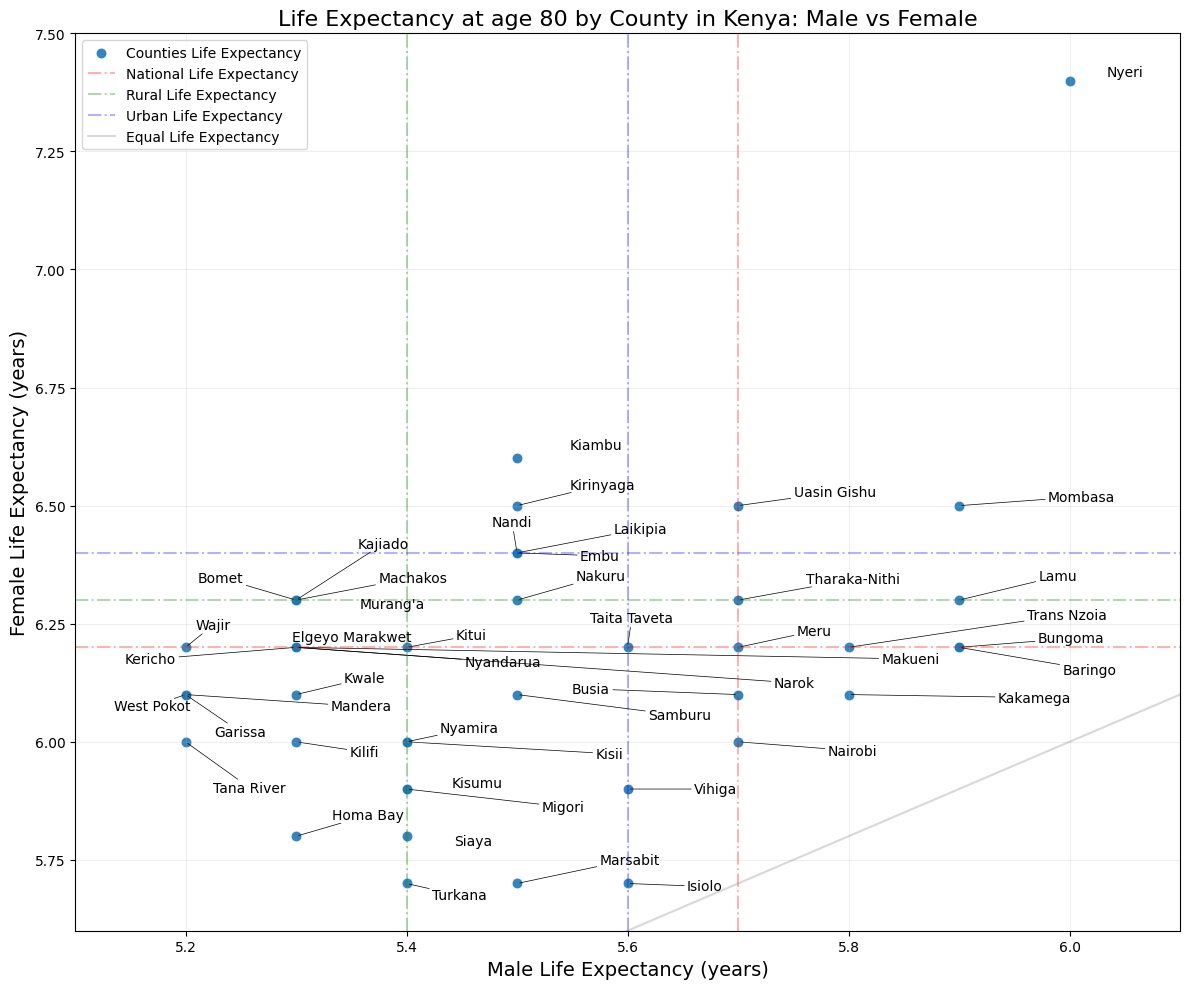

#### Analysis of Life Expectancy at age 80

##### Top 5 counties with greatest and least life expectancy - age 80

|  | \[men\] by_county_desc | \[men\] by_county_asc | \[women\] by_county_desc | \[women\] by_county_asc |
|----|----|----|----|----|
| 1 | Nyeri - 6.0 | West Pokot - 5.2 | Nyeri - 7.4 | Marsabit - 5.7 |
| 2 | Mombasa - 5.9 | Tana River - 5.2 | Kiambu - 6.6 | Isiolo - 5.7 |
| 3 | Bungoma - 5.9 | Garissa - 5.2 | Mombasa - 6.5 | Turkana - 5.7 |
| 4 | Lamu - 5.9 | Wajir - 5.2 | Uasin Gishu - 6.5 | Homa Bay - 5.8 |
| 5 | Baringo - 5.9 | Mandera - 5.2 | Kirinyaga - 6.5 | Siaya - 5.8 |

##### Top 5 counties above and below National life expectancy - age 80

|  | \(7\) \[men\] above national | \(40\) \[men\] below national | \(15\) \[women\] above national | \(32\) \[women\] below national |
|----|----|----|----|----|
| 1 | Mombasa - 5.9 | Tana River - 5.2 | Kiambu - 6.6 | Isiolo - 5.7 |
| 2 | Lamu - 5.9 | Garissa - 5.2 | Mombasa - 6.5 | Turkana - 5.7 |
| 3 | Baringo - 5.9 | Wajir - 5.2 | Kirinyaga - 6.5 | Homa Bay - 5.8 |
| 4 | Bungoma - 5.9 | Mandera - 5.2 | Uasin Gishu - 6.5 | Siaya - 5.8 |
| 5 | Trans Nzoia - 5.8 | Narok - 5.3 | Embu - 6.4 | Migori - 5.9 |

##### Top 5 counties above and below Rural life expectancy - age 80

|  | \(23\) \[men\] above rural | \(24\) \[men\] below rural | \(8\) \[women\] above rural | \(39\) \[women\] below rural |
|----|----|----|----|----|
| 1 | Mombasa - 5.9 | Garissa - 5.2 | Kiambu - 6.6 | Isiolo - 5.7 |
| 2 | Lamu - 5.9 | Wajir - 5.2 | Mombasa - 6.5 | Turkana - 5.7 |
| 3 | Bungoma - 5.9 | Mandera - 5.2 | Kirinyaga - 6.5 | Homa Bay - 5.8 |
| 4 | Baringo - 5.9 | West Pokot - 5.2 | Uasin Gishu - 6.5 | Siaya - 5.8 |
| 5 | Kakamega - 5.8 | Kwale - 5.3 | Embu - 6.4 | Migori - 5.9 |

##### Top 5 counties above and below Urban life expectancy - age 80

|  | \(12\) \[men\] above urban | \(35\) \[men\] below urban | \(5\) \[women\] above urban | \(42\) \[women\] below urban |
|----|----|----|----|----|
| 1 | Mombasa - 5.9 | Garissa - 5.2 | Kiambu - 6.6 | Isiolo - 5.7 |
| 2 | Lamu - 5.9 | Wajir - 5.2 | Mombasa - 6.5 | Turkana - 5.7 |
| 3 | Baringo - 5.9 | Mandera - 5.2 | Kirinyaga - 6.5 | Homa Bay - 5.8 |
| 4 | Bungoma - 5.9 | West Pokot - 5.2 | Uasin Gishu - 6.5 | Siaya - 5.8 |
| 5 | Trans Nzoia - 5.8 | Kwale - 5.3 | None | Migori - 5.9 |

##### Other Statistics - age 80

|       | MALE      | FEMALE    |
|-------|-----------|-----------|
| count | 47.000000 | 47.000000 |
| mean  | 5.487234  | 6.176596  |
| std   | 0.223234  | 0.281466  |
| min   | 5.200000  | 5.700000  |
| 25%   | 5.300000  | 6.000000  |
| 50%   | 5.400000  | 6.200000  |
| 75%   | 5.650000  | 6.300000  |
| max   | 6.000000  | 7.400000  |

## Insights

-   The rural and national life expectancy is are close, which confirms
    that majority of Kenyans lives in rural areas.
-   Men and Women of Nyeri county Have the greatest overall life
    expectancy, in all ranges.
-   Isiolo county is the only county men below 80 years live longer than
    women.

------------------------------------------------------------------------

***Disclaimer:*** *For information only. Accuracy or completeness not
guaranteed. Illegal use prohibited. Not professional advice or
solicitation.* ***Read more:
[/terms-of-service](https://toknow.ai/terms-of-service)***